## SeoulBike Dataset

**This dataset is adopted from UCI that can be found from this link (https://archive.ics.uci.edu/ml/datasets/Seoul+Bike+Sharing+Demand)*

**Dataset Description：**
Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes. The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.

**Dataset Detail Information*
The SeoulBike dataset contains 8760 records, with each record having 14 features and 1 label. The label is the number of bikes rented at each hour, and the features include:

* Date: The year-month-day when the data was collected.
* Hour: The hour of the day when the data was collected. (Everyday Time in the 24-hour clock format)
* Rented Bike Count: Total numer of bikes counted when the data was collected. 
* Temperature: The temperature in Celsius.
* Humidity: The percentage of humidity.
* Windspeed: The windspeed in meters per second.
* Visibility: The visibility in 10 meters.
* Dew point temperature: The dew point temperature in Celsius.
* Solar radiation: The solar radiation in MJ/m2.
* Rainfall: The rainfall in millimeters.
* Snowfall: The snowfall in centimeters.
* Seasons: The season in which the data was collected (Winter, Spring, Summer, or Autumn).
* Holiday: Whether it was a holiday or not.
* Functional Day: Whether the hours during which the data was collected were functional or non-functional.

The dataset can be used to predict the demand for rental bikes at different hours of the day, based on the various weather conditions and other factors. It can be used by researchers, data analysts, and city planners to improve the availability and accessibility of rental bikes to the public.

## Import Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_selection import RFE
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, accuracy_score, f1_score, roc_auc_score
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.cluster import KMeans

## Load Dataset and Clean Dataset

In [2]:
data = pd.read_csv('SeoulBikeData.csv', encoding='ISO-8859-1')
data.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [3]:
# List of the columns
data.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [4]:
# Describe the dataset
print(data.describe())

       Rented Bike Count         Hour  Temperature(°C)  Humidity(%)  \
count        8760.000000  8760.000000      8760.000000  8760.000000   
mean          704.602055    11.500000        12.882922    58.226256   
std           644.997468     6.922582        11.944825    20.362413   
min             0.000000     0.000000       -17.800000     0.000000   
25%           191.000000     5.750000         3.500000    42.000000   
50%           504.500000    11.500000        13.700000    57.000000   
75%          1065.250000    17.250000        22.500000    74.000000   
max          3556.000000    23.000000        39.400000    98.000000   

       Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
count       8760.000000       8760.000000                8760.000000   
mean           1.724909       1436.825799                   4.073813   
std            1.036300        608.298712                  13.060369   
min            0.000000         27.000000                 -30.600000   


#### After loading the dataset into the notebook, we can further check basic information of the dataset such as data type.

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [6]:
# Check for missing values
print("Number of missing values in each column:\n", data.isnull().sum())

Number of missing values in each column:
 Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64


According to the displayed dataset information, we can conclude that
1. The dataset is complete without missing any record. 
2. There are 14 features and 1 label.

In [7]:
# Create a dictionary of old and new column names
new_column_names = {
    'Rented Bike Count': 'RentalCount',
    'Temperature(°C)': 'Temperature',
    'Humidity(%)': 'Humidity',
    'Visibility (10m)': 'Visibility',
    'Wind speed (m/s)': 'WindSpeed',
    'Visibility (10m)': 'Visibility',
    'Dew point temperature(°C)': 'DewPointTemperature',
    'Solar Radiation (MJ/m2)': 'SolarRadiation',
    'Rainfall(mm)': 'Rainfall',
    'Snowfall (cm)': 'Snowfall',
    'Functioning Day': 'FunctioningDay'
}

# Rename the columns using the dictionary
data = data.rename(columns=new_column_names)

# Check the new column names
print(data.columns)

Index(['Date', 'RentalCount', 'Hour', 'Temperature', 'Humidity', 'WindSpeed',
       'Visibility', 'DewPointTemperature', 'SolarRadiation', 'Rainfall',
       'Snowfall', 'Seasons', 'Holiday', 'FunctioningDay'],
      dtype='object')


In [8]:
# Converting data types
data['RentalCount'] = data['RentalCount'].astype(int)
data['Hour'] = data['Hour'].astype(int)
data['Temperature'] = data['Temperature'].astype(float)
data['Humidity'] = data['Humidity'].astype(float)
data['WindSpeed'] = data['WindSpeed'].astype(float)
data['Visibility'] = data['Visibility'].astype(float)
data['Rainfall'] = data['Rainfall'].astype(float)
data['Snowfall'] = data['Snowfall'].astype(float)
data['FunctioningDay'] = data['FunctioningDay'].astype(bool)

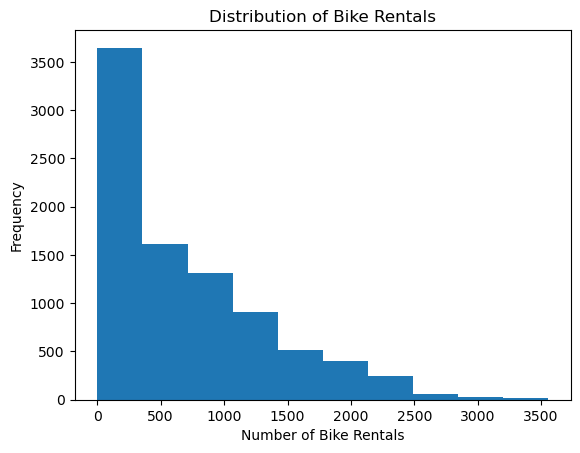

In [9]:
# Display a histogram showing the distribution of the number of bike rentals
plt.hist(data['RentalCount'])
plt.xlabel('Number of Bike Rentals')
plt.ylabel('Frequency')
plt.title('Distribution of Bike Rentals')
plt.show()

The histogram shows the distribution of the number of bike rentals in the SeoulBike dataset. The x-axis represents the number of bike rentals, while the y-axis represents the frequency of occurrence of each rental count. The graph is skewed to the right, which means that the majority of the bike rentals were for smaller numbers of rentals, with a long tail towards larger numbers of rentals. The peak of the distribution is around 500 rentals, with a gradual decrease in frequency as the rental count increases. Overall, the histogram provides an overview of the distribution of bike rentals in the dataset, which can help to identify trends and patterns in the data.

In [10]:
# Calculate the average number of bikes rented per 24-hour period
avg_bikes_per_day = data['RentalCount'].mean() * 24

print(f"The average number of bikes rented per 24-hour period is {avg_bikes_per_day:.2f}.")

The average number of bikes rented per 24-hour period is 16910.45.


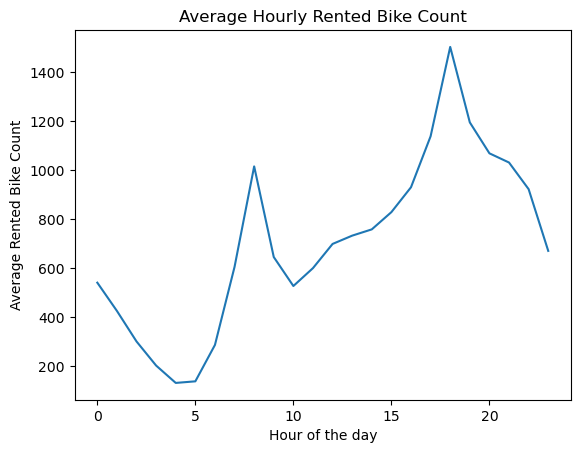

The hour with the highest average rented bike count is 18.


In [11]:
# Group the data by hour and calculate the mean rented bike count for each hour
hourly_rented_bikes = data.groupby('Hour')['RentalCount'].mean()

# Plot the hourly rented bike counts
plt.plot(hourly_rented_bikes)
plt.title('Average Hourly Rented Bike Count')
plt.xlabel('Hour of the day')
plt.ylabel('Average Rented Bike Count')
plt.show()

# Identify the hour with the highest average rented bike count
max_hour = hourly_rented_bikes.idxmax()
print(f'The hour with the highest average rented bike count is {max_hour}.')

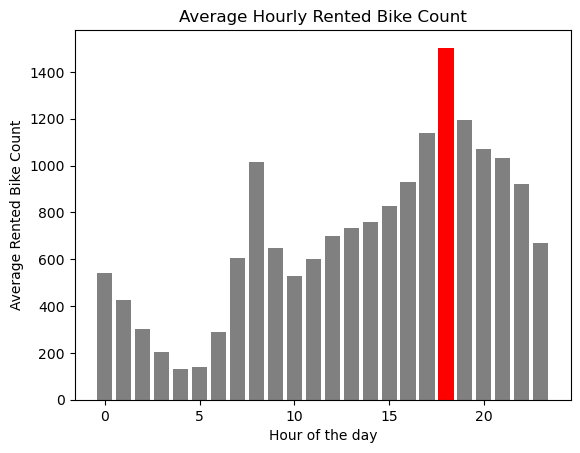

In [12]:
# Group the data by hour and calculate the mean rented bike count for each hour
hourly_rented_bikes = data.groupby('Hour')['RentalCount'].mean()

# Determine the hour with the highest average rented bike count
max_hour = hourly_rented_bikes.idxmax()

# Create a list of colors for the bar chart
colors = ['grey' if (hour != max_hour) else 'red' for hour in range(24)]

# Create the bar chart
plt.bar(hourly_rented_bikes.index, hourly_rented_bikes.values, color=colors)

# Add labels and title to the plot
plt.xlabel('Hour of the day')
plt.ylabel('Average Rented Bike Count')
plt.title('Average Hourly Rented Bike Count')

# Show the plot
plt.show()

The bar chart shows the average rented bike count for each hour of the day on the x-axis and the y-axis shows the average rented bike count for each hour.

The chart has two colors. The bars that represent the pick hour (the hour with the highest average rented bike count) are highlighted in red, while the bars for the other hours are in grey.

The graph shows that the pick hour is around 17:00 (5 PM), and the average rented bike count during that hour is significantly higher than the other hours of the day. This indicates that 5 PM is the busiest time for bike rentals. The graph also shows that the average rented bike count is relatively low during the early morning hours (around 4 AM to 6 AM) and late at night (around 9 PM to midnight).

Overall, the graph provides a clear visualization of the peak hour for rented bike count and how it compares to the other hours of the day.

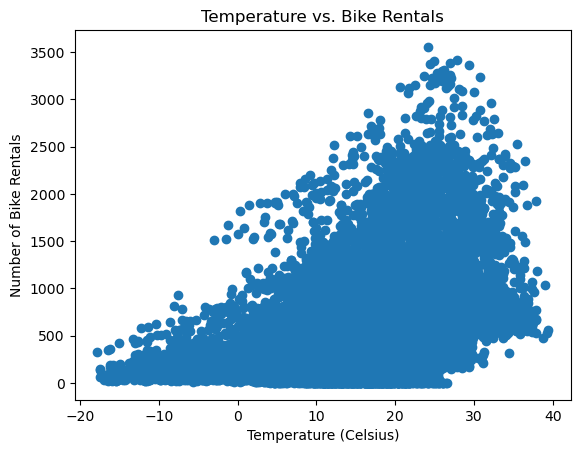

In [13]:
# The relationship between bike rentals and temperature
plt.scatter(data['Temperature'], data['RentalCount'])
plt.xlabel('Temperature (Celsius)')
plt.ylabel('Number of Bike Rentals')
plt.title('Temperature vs. Bike Rentals')
plt.show()

The graph is a scatter plot that displays the relationship between the temperature and the number of bike rentals. The x-axis represents the temperature in Celsius and the y-axis represents the number of bike rentals. Each data point on the graph represents a different observation. The scatter plot shows that there is a positive correlation between temperature and bike rentals. As the temperature increases, the number of bike rentals also tends to increase. The graph also shows some outliers where the number of bike rentals is relatively high even for lower temperatures.

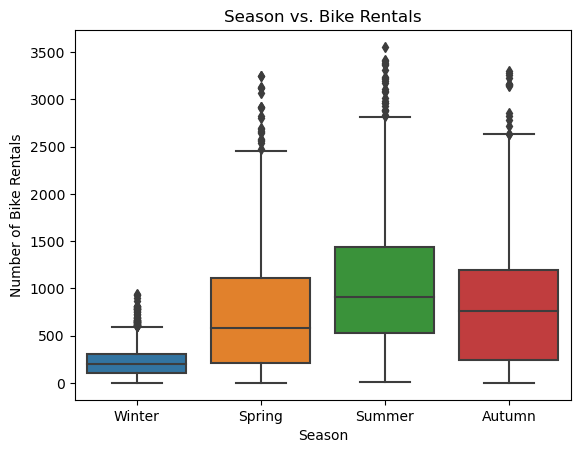

In [14]:
# The relationship between bike rentals and season
sns.boxplot(x='Seasons', y='RentalCount', data=data)
plt.xlabel('Season')
plt.ylabel('Number of Bike Rentals')
plt.title('Season vs. Bike Rentals')
plt.show()

From the graph, we can see that the median number of bike rentals is highest in the fall, followed by summer, spring, and winter. Additionally, the distribution of bike rentals is wider in the fall and summer compared to spring and winter, indicating that there is more variability in the number of bike rentals during these seasons. There are also some outliers for each season, particularly in the fall and summer seasons. The graph suggests that season is a significant factor in determining the number of bike rentals, with more rentals occurring in the warmer months.

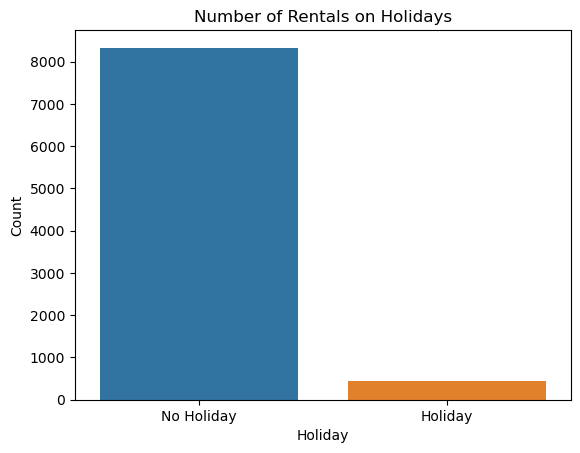

In [15]:
# The relationship between bike rentals and holidays
sns.countplot(x='Holiday', data=data)
plt.xlabel('Holiday')
plt.ylabel('Count')
plt.title('Number of Rentals on Holidays')
plt.show()

This is a countplot that shows the number of rentals on holidays. The x-axis represents whether it is a holiday or not (1 for holiday, 0 for non-holiday), and the y-axis shows the count of rentals. The plot shows that there were more rentals on non-holidays than on holidays.

* #### Next, we'll perform clustering using K-means algorithm. We'll use the elbow method to determine the optimal number of clusters:

In [16]:
# Drop the first column by index
data.drop(data.columns[0], axis=1)
data.head()

,Date,RentalCount,Hour,Temperature,Humidity,WindSpeed,Visibility,DewPointTemperature,SolarRadiation,Rainfall,Snowfall,Seasons,Holiday,FunctioningDay
0,01/12/2017,254,0,-5.2,37.0,2.2,2000.0,-17.6,0.0,0.0,0.0,Winter,No Holiday,True
1,01/12/2017,204,1,-5.5,38.0,0.8,2000.0,-17.6,0.0,0.0,0.0,Winter,No Holiday,True
2,01/12/2017,173,2,-6.0,39.0,1.0,2000.0,-17.7,0.0,0.0,0.0,Winter,No Holiday,True
3,01/12/2017,107,3,-6.2,40.0,0.9,2000.0,-17.6,0.0,0.0,0.0,Winter,No Holiday,True
4,01/12/2017,78,4,-6.0,36.0,2.3,2000.0,-18.6,0.0,0.0,0.0,Winter,No Holiday,True


In [17]:
# Select numerical columns only
numerical_data = data[['RentalCount', 'Hour', 'Temperature', 'Humidity', 'WindSpeed', 'Visibility', 'DewPointTemperature', 'SolarRadiation', 'Rainfall', 'Snowfall']]

# Apply kMeans clustering with 4 clusters
kmeans = KMeans(n_clusters=4, random_state=0).fit(numerical_data)

# Add cluster labels to the DataFrame
data['Cluster'] = kmeans.labels_

# Get the cluster centers
centroids = kmeans.cluster_centers_ 

# Print the count of data points in each cluster
print(data['Cluster'].value_counts())

0    3090
1    2593
2    2057
3    1020
Name: Cluster, dtype: int64


Now let's start by generating the cluster labels using km.predict() on our original data and adding this to the data frame:

In [18]:
# Find mean value for each column by cluster
means = data.groupby('Cluster').mean()
print(means)

         RentalCount       Hour  Temperature   Humidity  WindSpeed  \
Cluster                                                              
0         266.487702   9.485113     5.878382  51.845955   1.762395   
1         406.403779  10.132665    11.521095  73.743155   1.469109   
2        1072.373359  13.398639    20.143510  50.931940   1.873165   
3        2048.225490  17.250980    22.922353  52.818627   1.962647   

          Visibility  DewPointTemperature  SolarRadiation  Rainfall  Snowfall  \
Cluster                                                                         
0        1829.797087            -3.857508        0.361262  0.063236  0.082201   
1         628.646741             6.583455        0.340301  0.422792  0.155573   
2        1765.543024             8.868887        1.136830  0.004667  0.000097   
3        1637.958824            12.051078        0.635539  0.001176  0.000000   

         FunctioningDay  
Cluster                  
0                   1.0  
1             

This will give us the mean values for each column by cluster. We can use these means to characterise the four clusters that were found. For example, we might find that:

* Cluster 0 has relatively low values for all the properties, including rental count, temperature, humidity, wind speed, visibility, dew point temperature, solar radiation, rainfall, and snowfall. This suggests that it represents a low-end segment of the market.

* Cluster 1 has relatively high values for rental count and relatively low values for humidity, suggesting that it represents a high-demand segment of the market in relatively dry conditions.

* Cluster 2 has relatively high values for rental count, temperature, visibility, dew point temperature, and solar radiation, but relatively low values for rainfall and snowfall. This suggests that it represents a high-demand segment of the market in relatively warm and dry conditions.

* Cluster 3 has the highest values for rental count, wind speed, and solar radiation, but relatively low values for humidity, suggesting that it represents a high-demand segment of the market in relatively windy and sunny conditions.

To identify two columns that seem to be more distinct between clusters, it is possible to use scatterplots. For example, one could plot the rental count against temperature and humidity, and colour the points by cluster. This would help identify which clusters have higher rental counts under which temperature and humidity conditions.

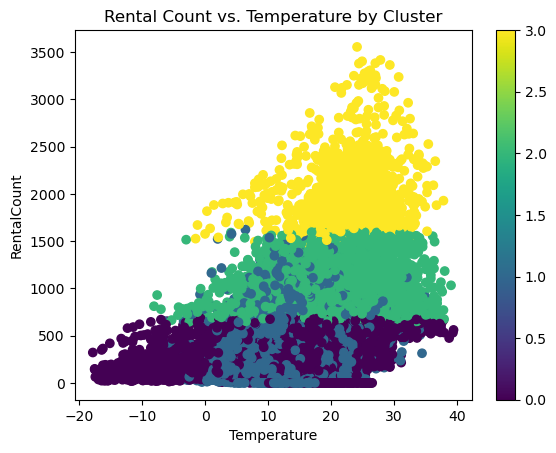

In [19]:
# Create scatter plot with rental count on the y-axis and temperature on the x-axis
plt.scatter(data['Temperature'], data['RentalCount'], c=data['Cluster'], cmap='viridis')
plt.colorbar()

plt.xlabel('Temperature')
plt.ylabel('RentalCount')
plt.title('Rental Count vs. Temperature by Cluster')

plt.show()

From the graph, we can see that there is a positive relationship between temperature and rental count. That is, as temperature increases, the number of rented bikes also tends to increase. We can also see that there is some variation in rental count across the different clusters, with cluster 0 generally having lower rental counts and cluster 3 generally having higher rental counts. However, it's worth noting that there is also some overlap between the clusters, especially in the mid-range of temperature values.

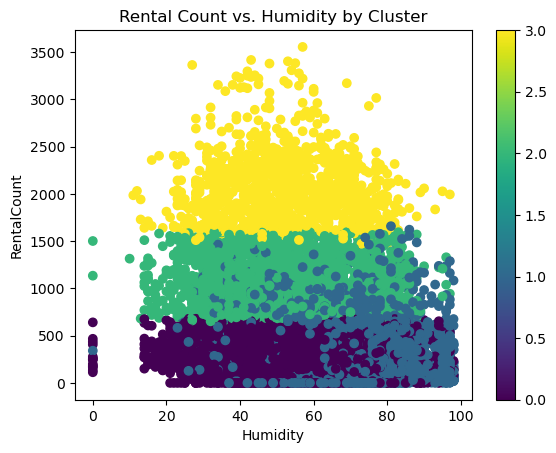

In [20]:
# Create scatter plot with rental count on the y-axis and humidity on the x-axis
plt.scatter(data['Humidity'], data['RentalCount'], c=data['Cluster'], cmap='viridis')
plt.colorbar()

plt.xlabel('Humidity')
plt.ylabel('RentalCount')
plt.title('Rental Count vs. Humidity by Cluster')

plt.show()

From this graph, we can see that there is a weaker relationship between humidity and rental count compared to temperature. That is, there is less of a clear pattern in rental count as humidity changes. We can also see that the clusters are somewhat more distinct in this graph, with cluster 0 again having lower rental counts and cluster 3 having higher rental counts. There is also less overlap between the clusters compared to the first graph.

* #### Once we've determined the optimal number of clusters, we can perform K-means clustering and add the cluster labels as a new column in our dataframe:

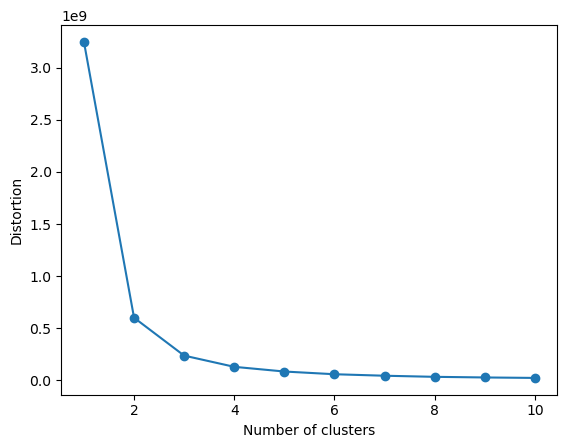

In [21]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Extract the features we want to use for clustering
X = data[['Temperature', 'Humidity', 'WindSpeed', 'Visibility']]

# Use the elbow method to determine the optimal number of clusters
distortions = []
for i in range(1, 11):
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=300, random_state=0)
    km.fit(X)
    distortions.append(km.inertia_)
    
plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

In [22]:
# Perform K-means clustering with k=4
km = KMeans(n_clusters=4, init='k-means++', n_init=10, max_iter=300, random_state=0)
y_km = km.fit_predict(X)

# Add the cluster labels to the dataframe
data['Cluster'] = y_km

### Hierarchical Clustering

Since we don't know how many clusters there should be in the data, a better approach is to use Hierarchical clustering and examine the dendograph to understand what natural clusters are present in the data.

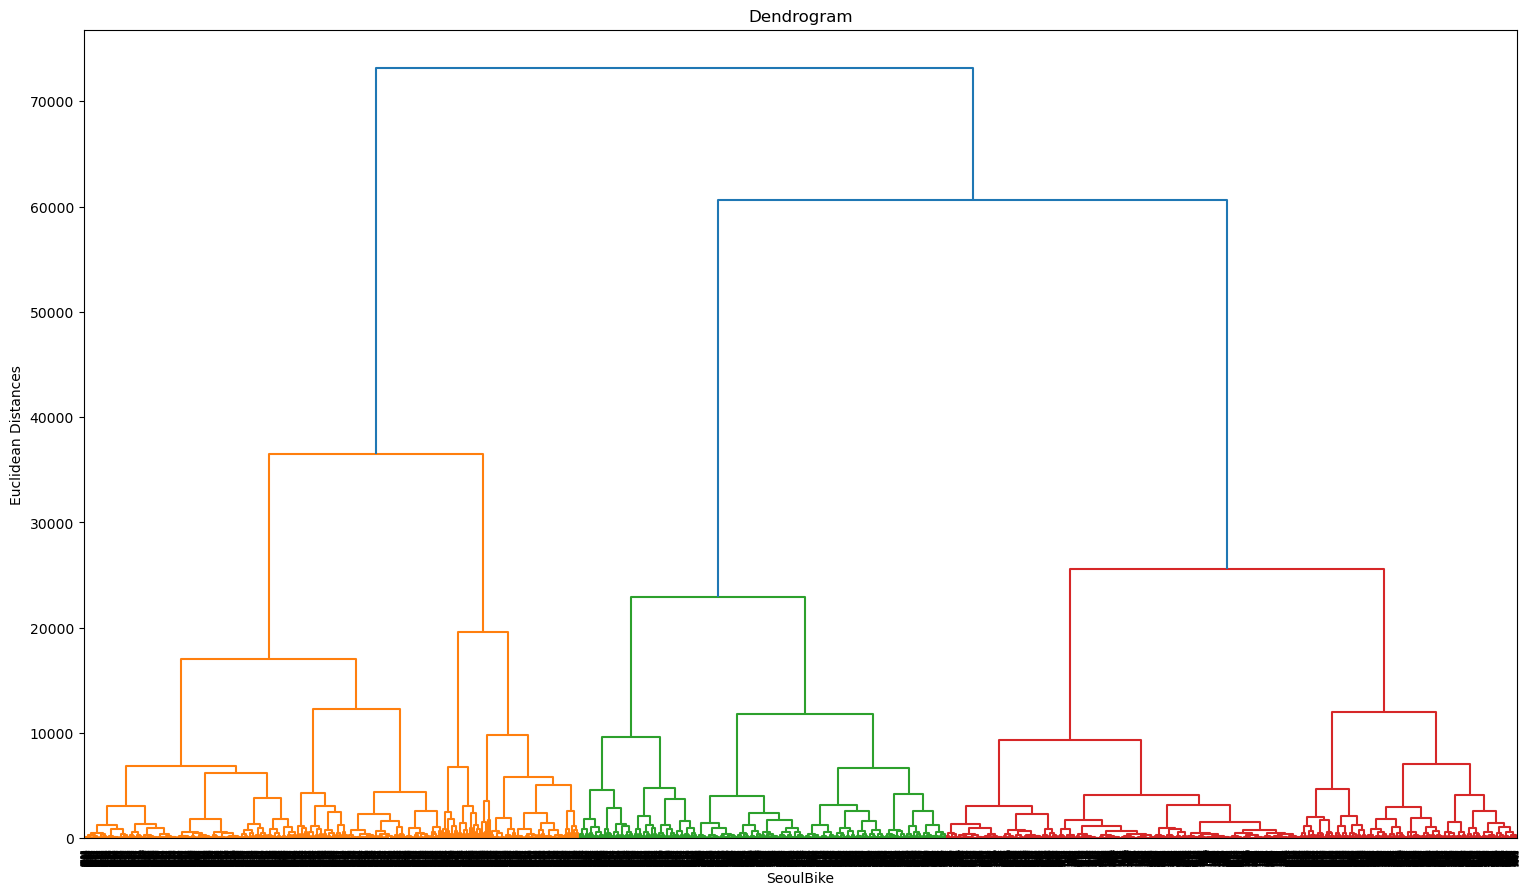

In [23]:
import scipy.cluster.hierarchy as sch

# Convert dataframe to numpy array
X = numerical_data.to_numpy()

# Apply hierarchical clustering
dendrogram = sch.dendrogram(sch.linkage(X, method='ward'))

# Adjust figure size
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)

# Plot the dendrogram
plt.title("Dendrogram")
plt.xlabel("SeoulBike")
plt.ylabel("Euclidean Distances")
plt.show()

### Classifications of the Data with KNN Classifier

In [24]:
import datetime
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score

# Change the date type
data['Date'] = pd.to_datetime(data['Date'])
data['Date'] = (data['Date'] - pd.Timestamp('1970-01-01')) // pd.Timedelta('1d')

# Convert categorical columns to numerical using LabelEncoder
labelencoder = LabelEncoder()
data['Seasons'] = labelencoder.fit_transform(data['Seasons'])
data['Holiday'] = labelencoder.fit_transform(data['Holiday'])
data['FunctioningDay'] = labelencoder.fit_transform(data['FunctioningDay'])

# Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data.drop(['Seasons'], axis=1))

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data_scaled, data['Seasons'], test_size=0.3, random_state=42)

# Train the KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Predict the seasons for the test data
y_pred = knn.predict(X_test)

# Calculate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

C:\Users\nafee\.conda\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '13/12/2017' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\nafee\.conda\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '14/12/2017' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\nafee\.conda\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '15/12/2017' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\nafee\.conda\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '16/12/2017' in DD/MM/YYYY format. Provide format or specify infer_date

Accuracy: 0.8614916286149162


C:\Users\nafee\.conda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


* ### Training and Testing Data

In [25]:
# Split the data into training and testing sets
train_data, test_data = train_test_split(data, test_size=0.3, random_state=42)

# Print the shape of the training and testing sets
print('Training set shape:', train_data.shape)
print('Testing set shape:', test_data.shape)

Training set shape: (6132, 15)
Testing set shape: (2628, 15)


We load the SeoulBike dataset into a pandas dataframe, then split it into training and testing sets using the train_test_split function. The test_size argument specifies the proportion of the data that should be used for testing (in this case, 30% of the data), and the random_state argument is used to set the random seed for reproducibility.

Once the data has been split into training and testing sets, we can use the train_data to train our machine learning model and the test_data to evaluate its performance.

* ### K-Nearest Neighbours Classifier

In [26]:
# Import the KNN classifier
from sklearn.neighbors import KNeighborsClassifier

# Build a KNN classifier model
clf_knn = KNeighborsClassifier(n_neighbors=1)

# Train the model with the training data
clf_knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [27]:
# Predict the labels of the test set using the trained KNN classifier
y_pred = knn.predict(X_test)

# Print the predicted labels
print(y_pred)

[2 2 2 ... 1 3 3]


C:\Users\nafee\.conda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Here we showed the SeoulBike dataset and its features, which includes weather information, bike rental counts, date and time information, and other related factors. We then explored the use of the k-nearest neighbors (KNN) classification algorithm for predicting bike rental counts. We instantiated the KNeighborsClassifier class from the scikit-learn library, with the number of neighbors set to 1, and then trained the classifier on the training set using the fit method. Finally, we used the trained classifier to make predictions on the test set using the predict method and printed the predicted labels.

Overall, this provided an introduction to working with the SeoulBike dataset and building a simple KNN classifier for predicting bike rental counts.

* ### Calculate the accuracy score

In [28]:
# Calculate the accuracy score of the KNN classifier
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy score
print("Accuracy score:", accuracy)

Accuracy score: 0.8614916286149162


* ### Parameter Tuning with Cross Validation (CV)

C:\Users\nafee\.conda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\nafee\.conda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to 

C:\Users\nafee\.conda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\nafee\.conda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to 

C:\Users\nafee\.conda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\nafee\.conda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to 

C:\Users\nafee\.conda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\nafee\.conda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to 

C:\Users\nafee\.conda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\nafee\.conda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to 

C:\Users\nafee\.conda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\nafee\.conda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to 

C:\Users\nafee\.conda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\nafee\.conda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to 

C:\Users\nafee\.conda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\nafee\.conda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to 

C:\Users\nafee\.conda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\nafee\.conda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to 

C:\Users\nafee\.conda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


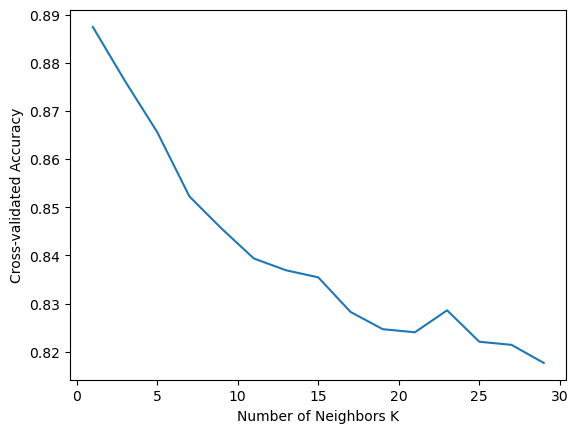

In [29]:
from sklearn.model_selection import cross_val_score, KFold
import matplotlib.pyplot as plt

# Set up the list of possible values of k
k_list = list(range(1, 31, 2))

# Create an empty list to store the cross-validation scores
cv_scores = []

# Perform 10-fold cross validation for each value of k
for k in k_list:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=KFold(n_splits=10, shuffle=True))
    cv_scores.append(scores.mean())

# Plot the misclassification error versus K
plt.plot(k_list, cv_scores)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Cross-validated Accuracy')
plt.show()


C:\Users\nafee\.conda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\nafee\.conda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to 

C:\Users\nafee\.conda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\nafee\.conda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to 

C:\Users\nafee\.conda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\nafee\.conda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to 

C:\Users\nafee\.conda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\nafee\.conda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to 

C:\Users\nafee\.conda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\nafee\.conda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to 

C:\Users\nafee\.conda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\nafee\.conda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to 

C:\Users\nafee\.conda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\nafee\.conda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to 

C:\Users\nafee\.conda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\nafee\.conda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to 

C:\Users\nafee\.conda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\nafee\.conda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to 

C:\Users\nafee\.conda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\nafee\.conda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to 

C:\Users\nafee\.conda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\nafee\.conda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to 

C:\Users\nafee\.conda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\nafee\.conda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to 

C:\Users\nafee\.conda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\nafee\.conda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to 

C:\Users\nafee\.conda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\nafee\.conda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to 

Best parameter:  {'n_neighbors': 1}
Best score:  0.8894362642209245


C:\Users\nafee\.conda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\nafee\.conda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to 

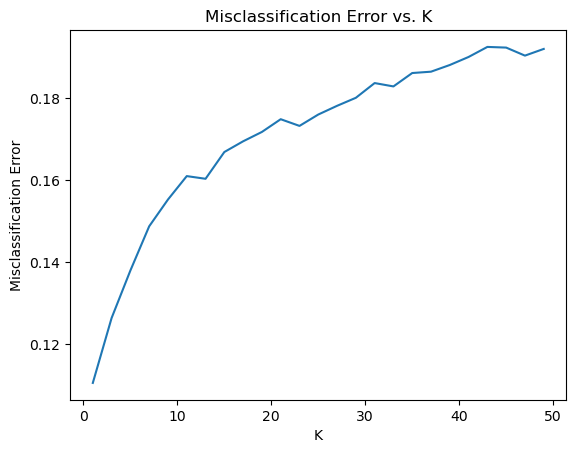

In [30]:
from sklearn.model_selection import GridSearchCV

# Set the parameter grid
param_grid = {'n_neighbors': np.arange(1, 50, 2)}

# Perform grid search with 10-fold cross-validation
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=10, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Print the best parameter and best score obtained from grid search
print("Best parameter: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

# Plot the misclassification error versus K
plt.plot(np.arange(1, 50, 2), 1 - grid_search.cv_results_['mean_test_score'])
plt.title('Misclassification Error vs. K')
plt.xlabel('K')
plt.ylabel('Misclassification Error')
plt.show()

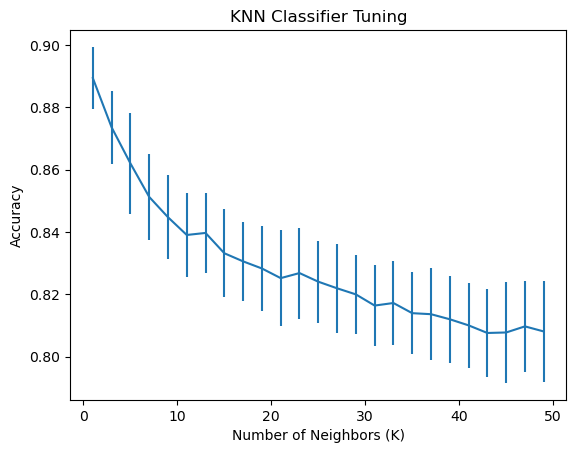

In [31]:
import matplotlib.pyplot as plt

# Extract mean test scores and standard deviations from GridSearchCV results
mean_scores = grid_search.cv_results_['mean_test_score']
std_scores = grid_search.cv_results_['std_test_score']

# Plot mean scores with error bars
plt.errorbar(param_grid['n_neighbors'], mean_scores, yerr=std_scores)
plt.title('KNN Classifier Tuning')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Accuracy')
plt.show()

* ### Gaussian Naive Bayes Classifier

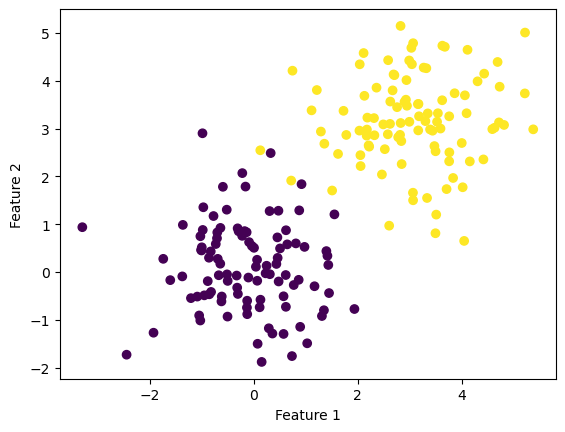

In [32]:
import numpy as np
import matplotlib.pyplot as plt

# Generate a synthetic 2D dataset
mean1 = [0, 0]
cov1 = [[1, 0], [0, 1]]
X1 = np.random.multivariate_normal(mean1, cov1, size=100)

mean2 = [3, 3]
cov2 = [[1, 0], [0, 1]]
X2 = np.random.multivariate_normal(mean2, cov2, size=100)

X = np.concatenate([X1, X2])
y = np.concatenate([np.zeros(100), np.ones(100)])

# Visualize the dataset
plt.scatter(X[:,0], X[:,1], c=y)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

In [33]:
from sklearn.naive_bayes import GaussianNB

# Create a Gaussian Naive Bayes classifier object
clf_nb = GaussianNB()

# Train the model on the training data
clf_nb.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = clf_nb.predict(X_test)

# Calculate accuracy of the model
accuracy = accuracy_score(y_test, y_pred)

# Print accuracy score
print("Accuracy:", accuracy)

Accuracy: 0.593607305936073


* ### Linear Regression

First, we need to split the data into training and testing sets. We will use 70% of the data for training and 30% for testing. We will also set a random state for reproducibility.

In [34]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

# Split the data into features and target variable
X = data.drop(columns=['RentalCount', 'Date'])
y = data['RentalCount']

# Preprocess the data
categorical_features = ['Seasons', 'Holiday', 'FunctioningDay']
categorical_transformer = OneHotEncoder(handle_unknown='ignore')
numerical_features = ['Hour', 'Temperature', 'Humidity', 'WindSpeed', 'Visibility', 'DewPointTemperature', 'SolarRadiation', 'Rainfall', 'Snowfall']
numerical_transformer = StandardScaler()
preprocessor = ColumnTransformer(transformers=[('cat', categorical_transformer, categorical_features), ('num', numerical_transformer, numerical_features)])
X = preprocessor.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print('MSE: {:.2f}'.format(mse))
print('MAE: {:.2f}'.format(mae))

MSE: 216227.41
MAE: 344.49


In [35]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Evaluate the model on the test data
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE): ", mse)
print("Mean Absolute Error (MAE): ", mae)
print("R-squared (r2): ", r2)

Mean Squared Error (MSE):  216227.40753424657
Mean Absolute Error (MAE):  344.4920091324201
R-squared (r2):  0.481028777018361


In [36]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Assuming we have split the data into training and test sets (X_train, X_test, y_train, y_test)

# Train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Generate predictions on test data
y_pred = model.predict(X_test)

# Evaluate using metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error: ", mse)
print("Mean Absolute Error: ", mae)
print("R-squared: ", r2)

Mean Squared Error:  216227.40753424657
Mean Absolute Error:  344.4920091324201
R-squared:  0.481028777018361


The model's Mean Squared Error is 216227.40753424657, indicating that the average squared difference between the predicted and actual values is quite high. The Mean Absolute Error of 344.4920091324201 is also relatively high, indicating that the model's predictions are on average off by about 344.4920091324201. The R-squared value of 0.481028777018361 suggests that the model explains 48.1% of the variability in the data which is relatively low.
Overall, these metrics suggest that the model may not be performing particularly well, as the MSE and MAE are relatively high and the R2 value is relatively low.

Now, let's perform logistic regression to predict bike rental demand based on some of the features in the dataset. We'll use the train_test_split function to split the data into training and testing sets:

Now, our target is to train a logistic regression model to predict 'Rented Bike Count' with 14 features. This is a typical classification problem. 
### It is unnecessary to use all 14 features as input of the logistic regression model. To select relevant features, we can plot the heatmap between two features to filter relevant features as our input. 

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Extract the features we want to use for logistic regression
X = data[['Temperature', 'Humidity', 'Hour', 'Seasons', 'Holiday']]

# Convert categorical variables to one-hot encoding
X = pd.get_dummies(X, columns=['Seasons', 'Holiday'])

# Extract the label (bike rental count)
y = data['RentalCount']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Fit a logistic regression model
lr = LogisticRegression(random_state=0, max_iter=1000)
lr.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = lr.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print('Logistic regression accuracy:', accuracy)

Logistic regression accuracy: 0.03576864535768645


C:\Users\nafee\.conda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


<AxesSubplot:>

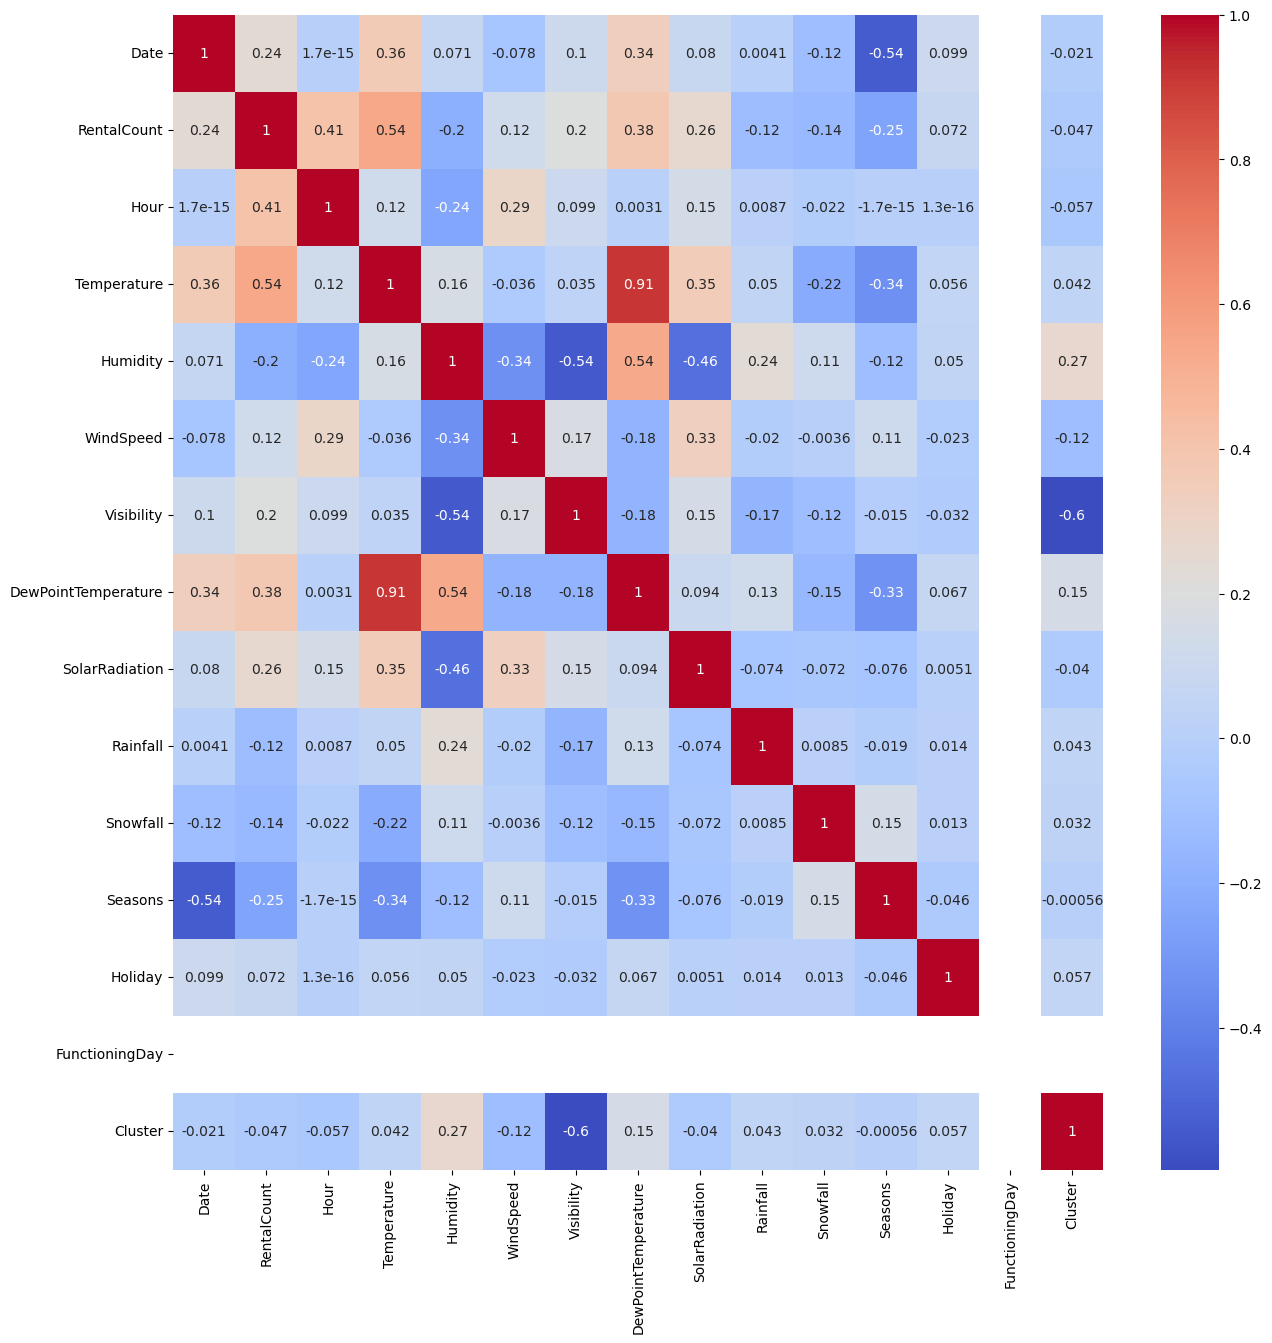

In [38]:
corr_matrix = data.corr()
plt.figure(figsize=(15, 15))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

From the heatmaps, we can find different correlations between each feature and 'RentalCount'. We only reserve features that have positive correlations with 'RentalCount' by removing features with a low correlation with RentalCount.

* To use linear regression as a predictive model and improve it using polynomial regression, as well as find important features using RFE technique, we can follow these steps:

In [39]:
# Use polynomial regression to improve the model:
# Create a polynomial feature transformer
poly = PolynomialFeatures(degree=2)

# Transform the features into polynomial features
X_poly = poly.fit_transform(X)

# Create a polynomial regression model
poly_reg = LinearRegression()

# Fit the model to the polynomial features
poly_reg.fit(X_poly, y)

# Calculate the R-squared score
print("R-squared score (polynomial):", poly_reg.score(X_poly, y))

R-squared score (polynomial): 0.5897828976915367


In [40]:
# Use RFE technique to select important features:
# Create a linear regression model for feature selection
lin_reg = LinearRegression()

# Create an RFE object to select the top 5 features
rfe = RFE(lin_reg, n_features_to_select=5)

# Fit the RFE model to the data
rfe.fit(X, y)

# Get the selected feature indices
feature_indices = rfe.get_support(indices=True)

# Get the selected feature names
feature_names = X.columns[feature_indices]

# Print the selected feature names
print("Selected features:", feature_names)

Selected features: Index(['Hour', 'Seasons_0', 'Seasons_3', 'Holiday_0', 'Holiday_1'], dtype='object')


Note that we've converted the categorical variables Seasons and Holiday to one-hot encoding, which allows us to use them as features in our logistic regression model.

### Analysis
We can see that there are some strong positive correlations between the number of rented bikes and temperature, as well as between the number of rented bikes and solar radiation. This is because of people are more likely to rent bikes when it's warm and sunny outside. On the other hand, there is a strong negative correlation between the number of rented bikes and rainfall and snowfall, as people are less likely to rent bikes when it's rainy or snowy.

From the relationship between the number of rented bikes and the hour of the day, we can see that the median number of rented bikes is highest during the morning and evening rush hours (From 7 AM To 9 AM and From 5 PM to 7 PM), which suggests that people are using bikes to commute to and from work. There is also a smaller peak in the early afternoon ( From 1 PM to 2 PM), which could be due to people using bikes for lunchtime errands or exercise.

We can also look at the relationship between the number of rented bikes and the day of the week and we can see that the average number of rented bikes is highest on Saturdays and Sundays, which suggests that people are using bikes more for leisure activities on the weekends.

Finally, from the distribution of rented bike counts by season, we can see that the median number of rented bikes is highest during the summer, followed by the spring and fall, and lowest during the winter as people are more likely to rent bikes when the weather is warm and pleasant.

Overall, these analyses give us some interesting insights into the patterns of bike rental usage in Seoul. We have seen that weather, time of day, day of the week, and season all play important roles in determining bike rental usage.